In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("data/laptop_price.csv", encoding='latin-1', index_col='laptop_ID')
df.sample(3)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
laptop_ID,,,,,,,,,,,,
1123,HP,15-bw011nv (A6-9220/4GB/1TB/FHD/W10),Notebook,15.6,Full HD 1920x1080,AMD A6-Series 9220 2.5GHz,4GB,1TB HDD,AMD Radeon R4,Windows 10,2.1kg,398.0
80,Acer,Aspire A515-51G-32MX,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7130U 2.7GHz,4GB,1TB HDD,Nvidia GeForce MX130,Windows 10,2.2kg,530.0
713,Dell,Vostro 5568,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.18kg,795.0


In [3]:
df.isnull().mean()*100

Company             0.0
Product             0.0
TypeName            0.0
Inches              0.0
ScreenResolution    0.0
Cpu                 0.0
Ram                 0.0
Memory              0.0
Gpu                 0.0
OpSys               0.0
Weight              0.0
Price_euros         0.0
dtype: float64

In [4]:
df.shape

(1303, 12)

In [5]:
df.duplicated().sum()

28

In [6]:
df = df.drop_duplicates()

In [7]:
df.sample(3)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
laptop_ID,,,,,,,,,,,,
14,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,256GB SSD,AMD Radeon R5 M430,Windows 10,2.2kg,498.9
1277,MSI,GE62 Apache,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.4kg,1229.0
64,Asus,UX410UA-GV350T (i5-8250U/8GB/256GB/FHD/W10),Notebook,14.0,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.4kg,941.0


In [8]:
df['Ram'] = df['Ram'].str.replace("GB", "")
df['Weight'] = df["Weight"].str.replace("kg", "")
df.sample(3)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
laptop_ID,,,,,,,,,,,,
524,Asus,ROG Zephyrus,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,24,512GB SSD,Nvidia GeForce GTX1080,Windows 10,2.24,2968.0
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.86,539.0
458,Dell,Precision 3520,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,16,256GB SSD,Nvidia Quadro M620,Windows 10,2.17,1975.0


In [9]:
df['Ram'] = df['Ram'].astype("int32")
df['Weight'] = df['Weight'].astype("float32")
df.sample(3)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
laptop_ID,,,,,,,,,,,,
708,Dell,Inspiron 5577,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.56,819.0
689,Asus,L502NA-GO052T (N3350/4GB/128GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,128GB SSD,Intel HD Graphics 500,Windows 10,1.86,419.0
705,Asus,Chromebook Flip,2 in 1 Convertible,12.5,Full HD / Touchscreen 1920x1080,Intel Core M M3-6Y30 0.9GHz,4,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.20,669.0


In [10]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                505
1366x768                                         263
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscr

In [11]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
df.sample(3)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen
laptop_ID,,,,,,,,,,,,,
983,Lenovo,IdeaPad 310-15IKB,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,6,256GB SSD,Nvidia GeForce 920MX,Windows 10,2.4,695.0,0
752,Lenovo,Thinkpad P51s,Workstation,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7600U 2.8GHz,16,1TB SSD,Nvidia Quadro M520M,Windows 10,2.5,3299.0,0
281,Dell,Inspiron 5770,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,128GB SSD + 1TB HDD,AMD Radeon 530,Linux,2.8,1099.0,0


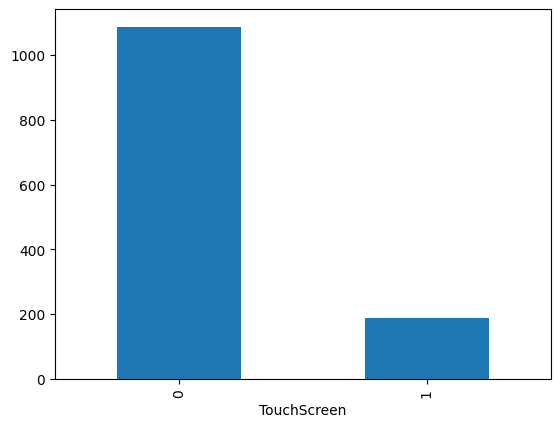

In [12]:
df['TouchScreen'].value_counts().plot(kind='bar')
plt.show()

In [13]:
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if "IPS" in x else 0)
df.sample(3)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS
laptop_ID,,,,,,,,,,,,,,
1272,Dell,Inspiron 3552,Notebook,15.6,1366x768,Intel Pentium Quad Core N3700 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,443.99,0,0
466,HP,17-BS092ND (i3-6006U/8GB/256GB/W10),Notebook,17.3,1600x900,Intel Core i3 6006U 2GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,2.50,639.90,0,0
488,Dell,Vostro 3568,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,2.18,586.60,0,0


In [14]:
df['Full_HD'] = df['ScreenResolution'].apply(lambda x: 1 if "Full HD" in x else 0)
df.sample(3)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,Full_HD
laptop_ID,,,,,,,,,,,,,,,
296,Asus,FX753VD-GC071T (i7-7700HQ/8GB/1TB/GeForce,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3.0,1187.00,0,0,1
403,Lenovo,ThinkPad E580,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,AMD Radeon RX 550,Windows 10,2.1,1229.56,0,1,1
279,Toshiba,Satellite Pro,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,8,500GB HDD,Nvidia GeForce 930M,Windows 10,2.2,812.00,0,0,0


In [15]:
df['Price_euros'].corr(df['Full_HD'])

0.18926001213643806

In [16]:
new_res = df['ScreenResolution'].str.split('x', n=2, expand=True)
new_res

,0,1
laptop_ID,,
1,IPS Panel Retina Display 2560,1600
2,1440,900
3,Full HD 1920,1080
4,IPS Panel Retina Display 2880,1800
5,IPS Panel Retina Display 2560,1600
...,...,...
1288,IPS Panel Full HD / Touchscreen 1920,1080
1289,IPS Panel Quad HD+ / Touchscreen 3200,1800
1290,1366,768


In [17]:
new_res[0]=new_res[0].str.replace(",","").str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
new_res

,0,1
laptop_ID,,
1,2560,1600
2,1440,900
3,1920,1080
4,2880,1800
5,2560,1600
...,...,...
1288,1920,1080
1289,3200,1800
1290,1366,768


In [18]:
df['x_res'] = new_res[0].astype('int')
df['y_res'] = new_res[1].astype('int')
df.sample(3)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,Full_HD,x_res,y_res
laptop_ID,,,,,,,,,,,,,,,,,
1095,Lenovo,Yoga 900S-12ISK,Ultrabook,12.5,IPS Panel Touchscreen 2560x1440,Intel Core M 6Y75 1.2GHz,8,512GB SSD,Intel HD Graphics 515,Windows 10,0.99,1399.0,1,1,0,2560,1440
55,Acer,Aspire 3,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,2.40,384.0,0,0,0,1366,768
396,Asus,Rog GL753VD-GC042T,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3.00,1039.0,0,0,1,1920,1080


In [19]:
df['PPI'] = (((df['x_res']**2) + (df['y_res']**2))**0.5/df['Inches']).astype("float")
df.sample(3)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,Full_HD,x_res,y_res,PPI
laptop_ID,,,,,,,,,,,,,,,,,,
869,Dell,Inspiron 5368,Notebook,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6200U 2.3GHz,8,1TB HDD,Intel HD Graphics 520,Windows 10,1.62,649.0,1,0,1,1920,1080,165.632118
198,Dell,Inspiron 5379,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8,1TB HDD,Intel UHD Graphics 620,Windows 10,1.62,839.0,1,1,1,1920,1080,165.632118
996,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6,256GB SSD,AMD Radeon 530,Windows 10,2.20,549.0,0,0,1,1920,1080,141.211998


In [20]:
df.drop(columns=['ScreenResolution', 'x_res', 'y_res'], inplace=True)
df.sample(3)

,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,Full_HD,PPI
laptop_ID,,,,,,,,,,,,,,,
14,Dell,Inspiron 3567,Notebook,15.6,Intel Core i3 6006U 2GHz,4,256GB SSD,AMD Radeon R5 M430,Windows 10,2.20,498.9,0,0,1,141.211998
1120,Dell,Latitude E5270,Ultrabook,12.5,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.50,1413.1,0,0,0,125.367428
149,HP,EliteBook Folio,Ultrabook,12.5,Intel Core M 6Y75 1.2GHz,8,512GB SSD,Intel HD Graphics 515,Windows 10,0.97,2014.0,1,1,0,352.465147


In [21]:
df['CPU_Name'] = df['Cpu'].apply(lambda x: " ".join(x.split()[:3]))
df.sample(3)

,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,Full_HD,PPI,CPU_Name
laptop_ID,,,,,,,,,,,,,,,,
793,Lenovo,ThinkPad T470s,Ultrabook,14.0,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.70,2299.0,0,0,1,157.350512,Intel Core i7
1277,MSI,GE62 Apache,Gaming,15.6,Intel Core i7 6700HQ 2.6GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.40,1229.0,0,0,1,141.211998,Intel Core i7
299,Lenovo,V330-15IKB (i5-8250U/8GB/256GB/FHD/W10),Notebook,15.6,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,2.05,739.0,0,0,1,141.211998,Intel Core i5


In [22]:
def processor(text):
    if text == "Intel Core i7" or text == "Intel Core i5" or text == "Intel Core i3":
        return text
    elif text.split()[0] == "Intel":
        return "Other Intel Processor"
    else:
        return "AMD Processor"

In [23]:
df['CPU_Brand'] = df['CPU_Name'].apply(processor)
df.sample(3)

,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,Full_HD,PPI,CPU_Name,CPU_Brand
laptop_ID,,,,,,,,,,,,,,,,,
121,Asus,X705UV-BX074T (i3-6006U/4GB/1TB/GeForce,Notebook,17.3,Intel Core i3 6006U 2GHz,4,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.000,564.0,0,0,1,127.335675,Intel Core i3,Intel Core i3
72,Microsoft,Surface Laptop,Ultrabook,13.5,Intel Core i5 7200U 2.5GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10 S,1.252,1089.0,1,0,0,200.842560,Intel Core i5,Intel Core i5
507,Asus,VivoBook E201NA,Netbook,11.6,Intel Celeron Dual Core N3350 1.1GHz,4,64GB Flash Storage,Intel HD Graphics 500,Windows 10 S,1.200,340.0,0,0,0,135.094211,Intel Celeron Dual,Other Intel Processor


In [24]:
df = df.drop(columns=["CPU_Name"])
df.sample(3)

,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,Full_HD,PPI,CPU_Brand
laptop_ID,,,,,,,,,,,,,,,,
742,Lenovo,ThinkPad 13,Notebook,13.3,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.44,960.0,0,1,1,165.632118,Intel Core i5
517,Dell,XPS 13,Ultrabook,13.3,Intel Core i5 7200U 2.5GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,1.29,899.0,1,1,1,165.632118,Intel Core i5
439,Lenovo,IdeaPad 320s-14IKB,Notebook,14.0,Intel Core i3 7130U 2.7GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.70,599.0,0,1,1,157.350512,Intel Core i3


In [25]:
df = df.drop("Cpu", axis=1)
df.sample(3)

,Company,Product,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,Full_HD,PPI,CPU_Brand
laptop_ID,,,,,,,,,,,,,,,
1038,Dell,Latitude E5570,Notebook,15.6,8,500GB HDD,Intel HD Graphics 520,Windows 10,2.09,1046.44,0,0,1,141.211998,Intel Core i5
657,Lenovo,Thinkpad X270,Ultrabook,12.5,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.36,1584.00,0,1,1,176.232574,Intel Core i7
965,Dell,Latitude 7480,Ultrabook,14.0,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.36,1775.00,0,0,1,157.350512,Intel Core i7


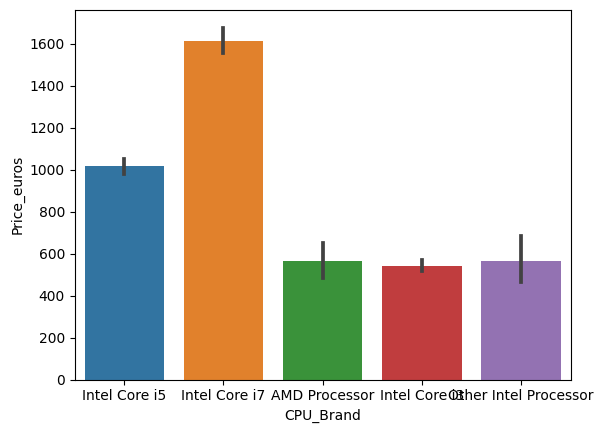

In [26]:
sns.barplot(x=df['CPU_Brand'], y=df['Price_euros'])
plt.show()

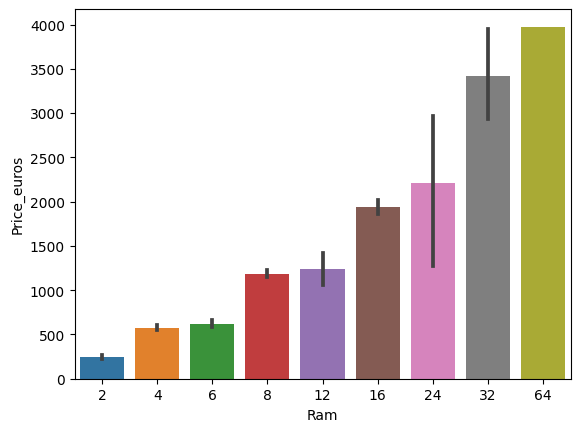

In [27]:
sns.barplot(x=df['Ram'], y=df['Price_euros'])
plt.show()

In [28]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df['Memory'] = df['Memory'].str.replace("GB", "")
df['Memory'] = df['Memory'].str.replace("TB", "000")
new = df['Memory'].str.split("+", n=1, expand=True)

df['first'] = new[0]
df['first'] = df['first'].str.strip()

df['second'] = new[1]

df['Layer1HDD']    = df['first'].apply(lambda x: 1 if "HDD" in x else 0)
df['Layer1SSD']    = df['first'].apply(lambda x: 1 if "SSD" in x else 0)
df['Layer1Hybrid'] = df['first'].apply(lambda x: 1 if "Hybrid" in x else 0)
df['Layer1Flash']  = df['first'].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '', regex=True)

df['second'].fillna('0', inplace=True)

df['Layer2HDD']    = df['second'].apply(lambda x: 1 if "HDD" in x else 0)
df['Layer2SSD']    = df['second'].apply(lambda x: 1 if "SSD" in x else 0)
df['Layer2Hybrid'] = df['second'].apply(lambda x: 1 if "Hybrid" in x else 0)
df['Layer2Flash']  = df['second'].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '', regex=True)

df['first'] = df['first'].astype('int')
df['second'] = df['second'].astype('int')

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash"]=(df["first"]*df["Layer1Flash"]+df["second"]*df["Layer2Flash"])

df.drop(columns=['Memory','first', 'second','Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash', 'Layer2HDD', 'Layer2SSD', 'Layer2Flash', 'Layer2Hybrid'], inplace=True)
df.sample(3)

,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,Full_HD,PPI,CPU_Brand,HDD,SSD,Hybrid,Flash
laptop_ID,,,,,,,,,,,,,,,,,,
782,Dell,Inspiron 7567,Gaming,15.6,8,Nvidia GeForce GTX 1050,Windows 10,2.62,1099.0,0,0,1,141.211998,Intel Core i7,1000,0,0,0
108,HP,Pavilion 14-BK001nv,Notebook,14.0,6,Nvidia GeForce 940MX,Windows 10,1.58,659.0,0,1,1,157.350512,Intel Core i5,0,256,0,0
493,Dell,Precision 3520,Workstation,15.6,16,Nvidia Quadro M620,Windows 10,2.17,2338.0,0,1,1,141.211998,Intel Core i7,0,512,0,0


In [29]:
# Useless memories
df = df.drop("Hybrid", axis=1)
df = df.drop("Flash", axis=1)

In [30]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [31]:
df['GPU_Brand'] = df['Gpu'].apply(lambda x: x.split()[0])
df.sample(3)

,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,Full_HD,PPI,CPU_Brand,HDD,SSD,GPU_Brand
laptop_ID,,,,,,,,,,,,,,,,,
897,Dell,Vostro 3568,Notebook,15.6,4,AMD Radeon R5 M420X,Linux,2.18,455.7,0,0,0,100.454670,Intel Core i3,1000,0,AMD
368,Lenovo,IdeaPad 320-17IKB,Notebook,17.3,6,Nvidia GeForce GTX 940MX,Windows 10,2.80,719.0,0,0,0,106.113062,Intel Core i5,1000,128,Nvidia
1091,Lenovo,Ideapad 700-15ISK,Notebook,15.6,4,Nvidia GeForce GTX 950M,Windows 10,2.30,977.0,0,1,1,141.211998,Intel Core i5,1000,0,Nvidia


In [32]:
df['GPU_Brand'].value_counts()

GPU_Brand
Intel     704
Nvidia    396
AMD       174
ARM         1
Name: count, dtype: int64

In [33]:
df = df[df["GPU_Brand"] != "ARM"]


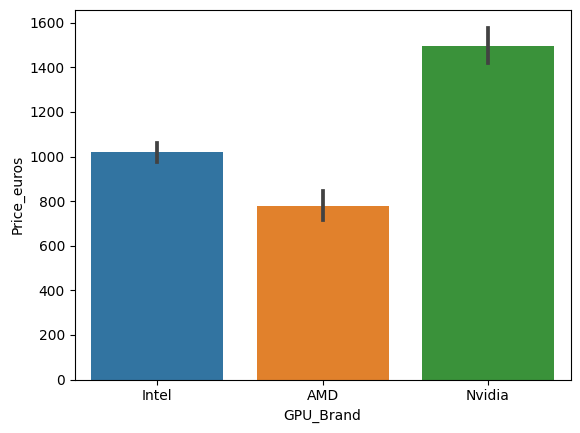

In [34]:
sns.barplot(x=df['GPU_Brand'], y=df['Price_euros'])
plt.show()

In [35]:
df = df.drop("Gpu", axis=1)

In [36]:
df.sample(3)

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,TouchScreen,IPS,Full_HD,PPI,CPU_Brand,HDD,SSD,GPU_Brand
laptop_ID,,,,,,,,,,,,,,,,
17,Dell,Inspiron 3567,Notebook,15.6,8,Windows 10,2.20,745.0,0,0,1,141.211998,Intel Core i7,0,256,AMD
822,Dell,Vostro 5568,Notebook,15.6,8,Windows 10,1.98,961.0,0,0,1,141.211998,Intel Core i7,1000,0,Nvidia
1046,MSI,GL72M 7RDX,Gaming,17.3,8,Windows 10,2.70,1191.8,0,0,1,127.335675,Intel Core i7,1000,128,Nvidia


In [37]:
def find_os(os):
    if os in ['Windows 10', 'Windows 7', 'Windows 10 S']:
        return "Windows"
    elif os in ['macOS', 'Mac OS X']:
        return "Mac"
    else:
        return "Linux/No OS/Others"

In [38]:
df["OpSys"] = df['OpSys'].apply(find_os)

In [39]:
df.sample(3)

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,TouchScreen,IPS,Full_HD,PPI,CPU_Brand,HDD,SSD,GPU_Brand
laptop_ID,,,,,,,,,,,,,,,,
1117,Acer,Chromebook 15,Notebook,15.6,4,Linux/No OS/Others,2.20,209.0,0,0,0,100.454670,Other Intel Processor,0,16,Intel
553,Lenovo,ThinkPad E470,Notebook,14.0,4,Windows,1.87,785.0,0,0,1,157.350512,Intel Core i5,500,0,Intel
141,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,4,Linux/No OS/Others,2.20,499.0,0,0,1,141.211998,Intel Core i5,1000,0,Nvidia


In [40]:
df = df.drop("Product", axis = 1)
df.sample(3)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,TouchScreen,IPS,Full_HD,PPI,CPU_Brand,HDD,SSD,GPU_Brand
laptop_ID,,,,,,,,,,,,,,,
113,Asus,Ultrabook,15.6,16,Windows,1.5,1262.00,0,0,1,141.211998,Intel Core i7,1000,256,Nvidia
203,HP,Notebook,17.3,8,Windows,2.5,1045.00,0,0,1,127.335675,Intel Core i7,0,256,Nvidia
1062,Lenovo,Gaming,17.3,16,Windows,4.6,2289.99,0,1,1,127.335675,Intel Core i7,1000,128,Nvidia


In [41]:
df.drop(columns=['Inches', "Full_HD"], inplace=True)
df.sample(2)

,Company,TypeName,Ram,OpSys,Weight,Price_euros,TouchScreen,IPS,PPI,CPU_Brand,HDD,SSD,GPU_Brand
laptop_ID,,,,,,,,,,,,,
564,Lenovo,Notebook,6,Windows,2.8,949.00,0,0,106.113062,Intel Core i7,1000,128,Nvidia
985,Dell,Ultrabook,8,Windows,1.5,1962.98,1,0,209.800683,Intel Core i7,0,256,Intel


In [42]:
df['Price'] = df['Price_euros']
df.drop("Price_euros", axis = 1, inplace = True)

In [43]:
df_x_train = df.iloc[:, :-1]

In [44]:
df_x = df.iloc[:, :-1].values

In [45]:
df_y = np.log(df['Price']).values

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, random_state=17, test_size=0.2)

In [47]:
s1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

s2 = LinearRegression()

pipe=Pipeline([
    ("Step1",s1),
    ("Step2",s2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
mean_absolute_error(y_pred, y_test)

0.2166337820737507